# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

* Através do resultado da função info, executada abaixo, pode-se concluir que há colunas com valores nulos. Por exemplo as colunas: cast, homepages e todas as colunas tem valores abaixo do total de entrada, 10866.  
* No próximo comando se obtem a quantidade de valores nulos. Veja: df.isnull().sum().  
* Com o comando *duplicated* do pandas, verifica-se as linhas duplicadas, as quais deverão ser descartadas.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

É possível notar no resultado anterior que o campo *genres* possuem 23 registros nulos. Mais adiante, iremos remover os registros correspondentes, pois gênero é uma variável importante em nossa análise.

**TODO: Há 44 Registro com Director NULO. Verificar se é necessário remover.**

In [4]:
# verify any duplicate rows in dataset.
sum(df.duplicated())

1

Apenas um registro duplicado foi encontrado. Este também será removido.


In [5]:
df[df.revenue == 0].shape


(6016, 21)

Existem **6016** registros cujo *revenue* é zero. Iremos ignorar estes registros também.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [6]:
#df.dropna(how='any', inplace=True)
df.dropna(subset=['genres'], inplace=True)
df.shape

(10843, 21)

In [7]:
df = df[df.revenue > 0 ]
df.shape

(4850, 21)

In [8]:
# checks if any of columns in dataset have null values - should print False
df.isnull().sum().any()

True

In [9]:
# verify any duplicate rows in dataset.
sum(df.duplicated())

1

Foi encontrado um registro duplicado. A seguir, remove-se a duplicação:

In [10]:
df.drop_duplicates(inplace=True)
# verify any duplicate rows in dataset.
sum(df.duplicated())

0

In [11]:
# save clean data
df.to_csv('movie-data.csv', index=False)

In [12]:
#Através do resultado da função info, pode-se concluir que todas as colunas não contém valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 21 columns):
id                      4849 non-null int64
imdb_id                 4849 non-null object
popularity              4849 non-null float64
budget                  4849 non-null int64
revenue                 4849 non-null int64
original_title          4849 non-null object
cast                    4844 non-null object
homepage                1665 non-null object
director                4848 non-null object
tagline                 4385 non-null object
keywords                4614 non-null object
overview                4849 non-null object
runtime                 4849 non-null int64
genres                  4849 non-null object
production_companies    4753 non-null object
release_date            4849 non-null object
vote_count              4849 non-null int64
vote_average            4849 non-null float64
release_year            4849 non-null int64
budget_adj              4849 non-null flo

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# convert budget and revenue columns to float
df['budget'] = df['budget'].astype('float')
df['revenue'] = df['revenue'].astype('float')
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
# save clean data
df.to_csv('movie-data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most popular from year to year?

Para responder essa questão, foram tomados os seguintes passos:
* Obter todos os gêneros do dataframe, sem duplicação;
* Criou-se um novo dataframe de filmes por genero (genres_1);
* Para melhor análise dos dados, criou-se uma relação de algumas variáveis com gênero em um período de cinco em cinco anos (quinquenio);
* E com os dados desta relação foi gerada uma nova tabela para a conclusão dessa investigação.


In [15]:
# Obtem lista de gêneros sem duplicação
lista = []
for g in df.genres.unique():
    lista.extend(  g.split('|') ) 
generos = set(lista)
print(generos)

{'War', 'Animation', 'Crime', 'Science Fiction', 'Fantasy', 'Family', 'Drama', 'Mystery', 'Documentary', 'Thriller', 'Romance', 'Music', 'Horror', 'Foreign', 'Action', 'Adventure', 'Western', 'TV Movie', 'History', 'Comedy'}


O conjunto **generos** obtido contém todos os gêneros encontrados. Agora é necessário agrupar os filmes em cada gênero.

In [16]:
# Obtendo filmes x gênero
movie_groups = []
for g in generos:    
    movie_gen = df[df.genres.str.contains(g)][['popularity', 'release_year', 'genres']]
    movie_gen['genres_1'] = np.repeat(g, movie_gen.shape[0])
    movie_groups.append(movie_gen)

movies = pd.concat(movie_groups)
movies.head(2)

,popularity,release_year,genres,genres_1
19,5.476958,2015,War|Adventure|Science Fiction,War
70,2.295730,2015,Drama|Thriller|War,War


Para facilitar a análise vamos agrupar os filmes de 5 em 5 anos e verificar a média da popularidade:

In [17]:
# Relação de algumas variáveis com gênero em um período de cinco em cinco anos

period = 5
movies['quiquenio'] = (movies.release_year // period)*period
movies.head(4)

,popularity,release_year,genres,genres_1,quiquenio
19,5.476958,2015,War|Adventure|Science Fiction,War,2015
70,2.295730,2015,Drama|Thriller|War,War,2015
172,0.874641,2015,History|Drama|War,War,2015
180,0.829111,2015,Comedy|Drama|War,War,2015


In [18]:
# Popularidade média por quinquenio
pivot_table = pd.pivot_table(movies, values='popularity', index=['quiquenio'], columns=['genres_1'], aggfunc='mean')
pivot_table

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
quiquenio,,,,,,,,,,,,,,,,,,,,
1960,1.500367,1.827838,2.631987,0.938070,0.741079,NaN,0.796239,0.999265,1.987819,NaN,0.753349,1.034079,0.931615,0.573544,0.710853,NaN,NaN,1.955844,1.199529,0.769762
1965,0.980355,1.172310,2.550704,0.917042,0.752185,NaN,0.657636,1.184698,0.241283,NaN,0.690924,0.724527,0.600345,1.203608,0.692549,1.178658,NaN,0.981700,0.603066,0.573502
1970,0.587404,0.798782,2.104724,0.607834,0.959113,0.029670,0.812207,1.755999,1.407273,NaN,0.474831,1.458410,0.420142,0.768832,0.410233,1.111263,NaN,0.802186,0.417715,0.395489
1975,1.260937,1.279633,0.654268,0.635279,0.724527,0.064029,0.699907,0.588169,0.719617,NaN,0.797715,0.980788,0.629629,0.547183,0.609931,1.550173,NaN,0.940305,1.156599,0.303817
1980,1.031243,1.170096,0.538428,0.704059,0.665240,0.351799,0.603874,0.978349,0.735961,0.148192,0.629624,0.613330,0.511719,0.464588,0.542461,1.145325,NaN,0.733800,0.688868,0.243985
1985,0.856970,1.012299,1.335978,0.671599,0.571668,0.168545,0.593510,0.876790,0.733901,0.077948,0.550389,0.505978,0.498092,0.468399,0.585325,0.871193,NaN,0.676806,0.840255,0.619817
1990,0.807403,0.947222,1.295850,0.702961,0.983848,0.233812,0.682160,0.947814,0.974657,0.289664,0.754725,0.566747,0.711961,0.658787,0.705771,0.873951,NaN,0.797536,0.881771,0.794337
1995,1.060483,1.144319,1.458253,0.724390,0.972304,0.248277,0.819076,1.044532,1.168953,0.195606,0.785814,0.820874,0.556169,1.015024,0.706677,1.214455,0.273628,0.992004,0.872232,0.710569
2000,1.239533,1.552073,1.445014,0.874149,0.915177,0.256732,0.823599,1.405372,2.309673,0.222396,0.915827,0.857811,0.689354,0.934911,0.882684,1.328103,NaN,0.971859,1.177404,0.828279


É notável que os gêneros *Foreign* e *TV Movie* possuem dados incompletos e portanto vamos excluir essas colunas: 

In [19]:
# Retirando colunas com valores vazios do novo dataframe
pivot_table.drop(columns=['Foreign', 'TV Movie'], inplace=True)
pivot_table

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
quiquenio,,,,,,,,,,,,,,,,,,
1960,1.500367,1.827838,2.631987,0.938070,0.741079,NaN,0.796239,0.999265,1.987819,0.753349,1.034079,0.931615,0.573544,0.710853,NaN,1.955844,1.199529,0.769762
1965,0.980355,1.172310,2.550704,0.917042,0.752185,NaN,0.657636,1.184698,0.241283,0.690924,0.724527,0.600345,1.203608,0.692549,1.178658,0.981700,0.603066,0.573502
1970,0.587404,0.798782,2.104724,0.607834,0.959113,0.029670,0.812207,1.755999,1.407273,0.474831,1.458410,0.420142,0.768832,0.410233,1.111263,0.802186,0.417715,0.395489
1975,1.260937,1.279633,0.654268,0.635279,0.724527,0.064029,0.699907,0.588169,0.719617,0.797715,0.980788,0.629629,0.547183,0.609931,1.550173,0.940305,1.156599,0.303817
1980,1.031243,1.170096,0.538428,0.704059,0.665240,0.351799,0.603874,0.978349,0.735961,0.629624,0.613330,0.511719,0.464588,0.542461,1.145325,0.733800,0.688868,0.243985
1985,0.856970,1.012299,1.335978,0.671599,0.571668,0.168545,0.593510,0.876790,0.733901,0.550389,0.505978,0.498092,0.468399,0.585325,0.871193,0.676806,0.840255,0.619817
1990,0.807403,0.947222,1.295850,0.702961,0.983848,0.233812,0.682160,0.947814,0.974657,0.754725,0.566747,0.711961,0.658787,0.705771,0.873951,0.797536,0.881771,0.794337
1995,1.060483,1.144319,1.458253,0.724390,0.972304,0.248277,0.819076,1.044532,1.168953,0.785814,0.820874,0.556169,1.015024,0.706677,1.214455,0.992004,0.872232,0.710569
2000,1.239533,1.552073,1.445014,0.874149,0.915177,0.256732,0.823599,1.405372,2.309673,0.915827,0.857811,0.689354,0.934911,0.882684,1.328103,0.971859,1.177404,0.828279


In [20]:
pivot_table.describe()

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
count,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11.000000,12.000000,12.000000,12.000000
mean,1.457855,1.684044,1.629244,0.877583,1.024178,0.216046,0.844173,1.290825,1.420601,0.862793,0.871477,0.701275,0.963247,0.785912,1.774944,1.216508,1.033574,1.066183
std,1.132246,1.221697,0.676118,0.320193,0.585424,0.101677,0.316596,0.572982,0.806409,0.409810,0.279470,0.216524,0.539750,0.337827,1.537389,0.732094,0.406813,1.408559
min,0.587404,0.798782,0.538428,0.607834,0.571668,0.029670,0.593510,0.588169,0.241283,0.474831,0.505978,0.420142,0.464588,0.410233,0.871193,0.676806,0.417715,0.243985
25%,0.949509,1.111314,1.325946,0.695120,0.736941,0.184862,0.676029,0.970715,0.735446,0.675599,0.696728,0.545056,0.566954,0.603779,1.128294,0.801024,0.802408,0.528999
50%,1.150008,1.225972,1.473551,0.793809,0.931245,0.244069,0.798095,1.114615,1.288113,0.763797,0.839342,0.659491,0.851872,0.706224,1.214455,0.976780,0.989607,0.740165
75%,1.342159,1.621015,2.166664,0.922299,0.975190,0.256150,0.820207,1.453536,2.036143,0.827243,0.994111,0.827399,1.071286,0.868684,1.478101,1.155608,1.182936,0.802823
max,4.857300,5.248548,2.631987,1.776127,2.786263,0.351799,1.758922,2.790577,2.946939,2.027768,1.458410,1.176951,2.301307,1.735462,6.168163,3.259221,1.765139,5.446267


Na descrição da tabela acima, pivot_table, nos mostra que pelo desvio padrão, *std*, o quão próximo está da média, ou seja, b 

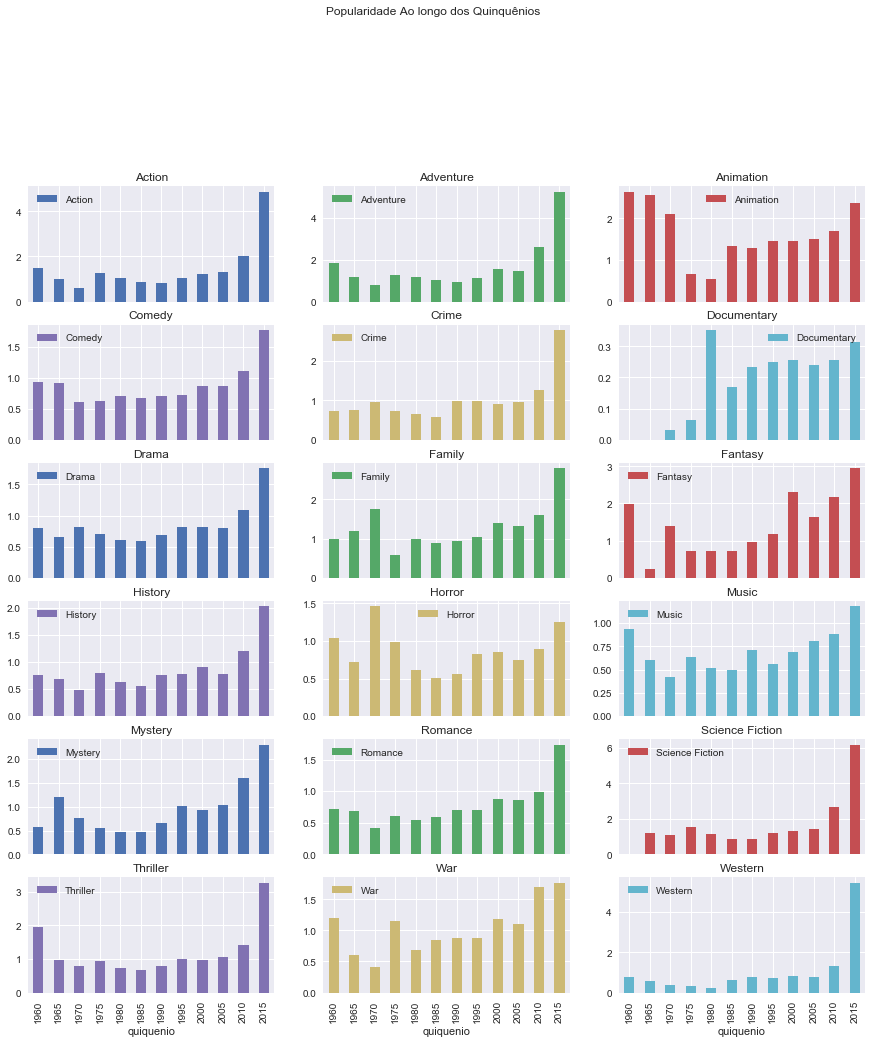

In [21]:
pivot_table.plot(kind='bar',title="Popularidade Ao longo dos Quinquênios",subplots=True,layout=(10,3),figsize=(15,25));


Pelo gráfico acima e considerando que os mais populares tem uma polularidade média um acima de 2. Tem-se, então, os seguintes resultados dos gêrenos mais populares ao longo dos anos:
* Adventure, 
* Action, 
* Fantasy, 
* Family, 
* Science Fiction


### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

In [22]:
# Obtendo arquivo limpo para a segunda investigação

df = pd.read_csv('movie-data.csv')

In [23]:
high_revenue = df[df.revenue >= 1e+9]

Nesta análise, vamos estabelecer um piso para filmes de alta receita armazenado em *high_revenue*.

In [24]:
high_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,22.000000,22.000000,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000,22.00000,2.200000e+01,2.200000e+01
mean,54171.545455,7.108372,1.910000e+08,1.333942e+09,140.272727,4779.727273,7.036364,2010.00000,1.891644e+08,1.351031e+09
std,62657.427738,6.312792,7.353587e+07,4.282809e+08,28.010511,2257.719080,0.627577,5.45981,7.162627e+07,4.843521e+08
min,58.000000,0.760503,2.200000e+07,1.001922e+09,91.000000,201.000000,5.600000,1995.00000,3.148127e+07,9.658933e+08
25%,3947.000000,4.502948,1.587500e+08,1.069505e+09,125.500000,3005.250000,6.575000,2009.25000,1.490037e+08,1.055430e+09
50%,31076.000000,5.828121,2.000000e+08,1.140239e+09,139.000000,4479.000000,7.200000,2011.50000,1.894907e+08,1.172701e+09
75%,92076.000000,7.579366,2.150000e+08,1.480946e+09,153.500000,6347.000000,7.500000,2013.00000,2.321605e+08,1.390772e+09
max,211672.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,8903.000000,8.100000,2015.00000,3.683713e+08,2.827124e+09


Com base na tabela anterior, obtida pelo comando describe do Pandas, as colunas com os desvios padrão mais próximos do revenue serão consideradas boas propriedades para serem associadas a um alto revenue. Veja tabela abaixo:


In [25]:
# Propriedades x Revenue

colunas = ['popularity','budget','revenue','runtime','release_year','genres','director']
high_revenue[colunas].sort_values('revenue',ascending=False)

,popularity,budget,revenue,runtime,release_year,genres,director
468,9.432768,237000000.0,2.781506e+09,162,2009,Action|Adventure|Fantasy|Science Fiction,James Cameron
3,11.173104,200000000.0,2.068178e+09,136,2015,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams
2159,4.355219,200000000.0,1.845034e+09,194,1997,Drama|Romance|Thriller,James Cameron
1804,7.637767,220000000.0,1.519558e+09,143,2012,Science Fiction|Action|Adventure,Joss Whedon
0,32.985763,150000000.0,1.513529e+09,124,2015,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow
4,9.335014,190000000.0,1.506249e+09,137,2015,Action|Crime|Thriller,James Wan
14,5.944927,280000000.0,1.405036e+09,141,2015,Action|Adventure|Science Fiction,Joss Whedon
1339,5.711315,125000000.0,1.327818e+09,130,2011,Adventure|Family|Fantasy,David Yates
2266,6.112766,150000000.0,1.274219e+09,102,2013,Animation|Adventure|Family,Chris Buck|Jennifer Lee
2269,4.946136,200000000.0,1.215440e+09,130,2013,Action|Adventure|Science Fiction,Shane Black


Logo, segundo os achados, as colunas: **'popularity','budget','revenue','runtime','release_year', 'genres','director'**, são propriedades associadas a alta receitas (revenues).

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!